# Quick Start Demo

ROCCO usage examples on a set of 10 publicly available ATAC-seq alignments.

See [documentation](https://nolan-h-hamilton.github.io/ROCCO/rocco.html) or run: `rocco --help` for additional details.

Note, this notebook assumes the current working directory is: `/path/to/ROCCO/demo/`


### Data
Download/index the ATAC-seq alignments (human lymphoblast) used for this demo:
```
xargs -L 1 curl -O -J -L < demo_bams.txt
```
in the current working directory, followed by:
```
samtools index -M *.bam
```
at the command line.


## [`rocco prep`](https://nolan-h-hamilton.github.io/ROCCO/rocco/prep.html)

Preprocess BAM files for each sample.

`rocco prep` will download the chromosome sizes file for the assembly specified with `-s/--sizes` if it is available online @ UCSC. If `-s/--sizes` is a sizes file available locally, it will just use that.



In [1]:
!rocco prep --bamdir . -s hg38

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11672  100 11672    0     0  81327      0 --:--:-- --:--:-- --:--:-- 81055
/work/users/n/h/nolanh/ROCCO/demo/ENCFF009NCL.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF110EWQ.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF231YYD.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF395ZMS.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF495DQP.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF621AYF.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF767FGV.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF797EAL.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF801THG.bam: running bamSitesToWig.py
/work/users/n/h/nolanh/ROCCO/demo/ENCFF948HNW.bam: running bamSitesToWig.py


## [`rocco chrom`](https://nolan-h-hamilton.github.io/ROCCO/rocco/chrom.html)

Run ROCCO on a single chromosome with default parameters

In [2]:
!rocco chrom --wig_path tracks_chr21 --chrom chr21

rocco chrom: reading wig file tracks_chr21/chr21_ENCFF009NCL.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF110EWQ.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF231YYD.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF395ZMS.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF495DQP.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF621AYF.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF767FGV.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF797EAL.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF801THG.bam.bw.wig
rocco chrom: reading wig file tracks_chr21/chr21_ENCFF948HNW.bam.bw.wig
rocco chrom: writing output: ./ROCCO_out_chr21_0.035_1.0_0.0_1.0_1.0_1.0.bed


**Example Behavior**: Results of `rocco chrom --wig_path tracks_chr21 --chrom chr21` over a ~100kb region in `chr21`. 

Highlights denote ROCCO annotations over clearly enriched regions (based on the samples' ENCODE `foldchg` signals) that are not fully captured by ENCODE's IDR threshold-based protocol.

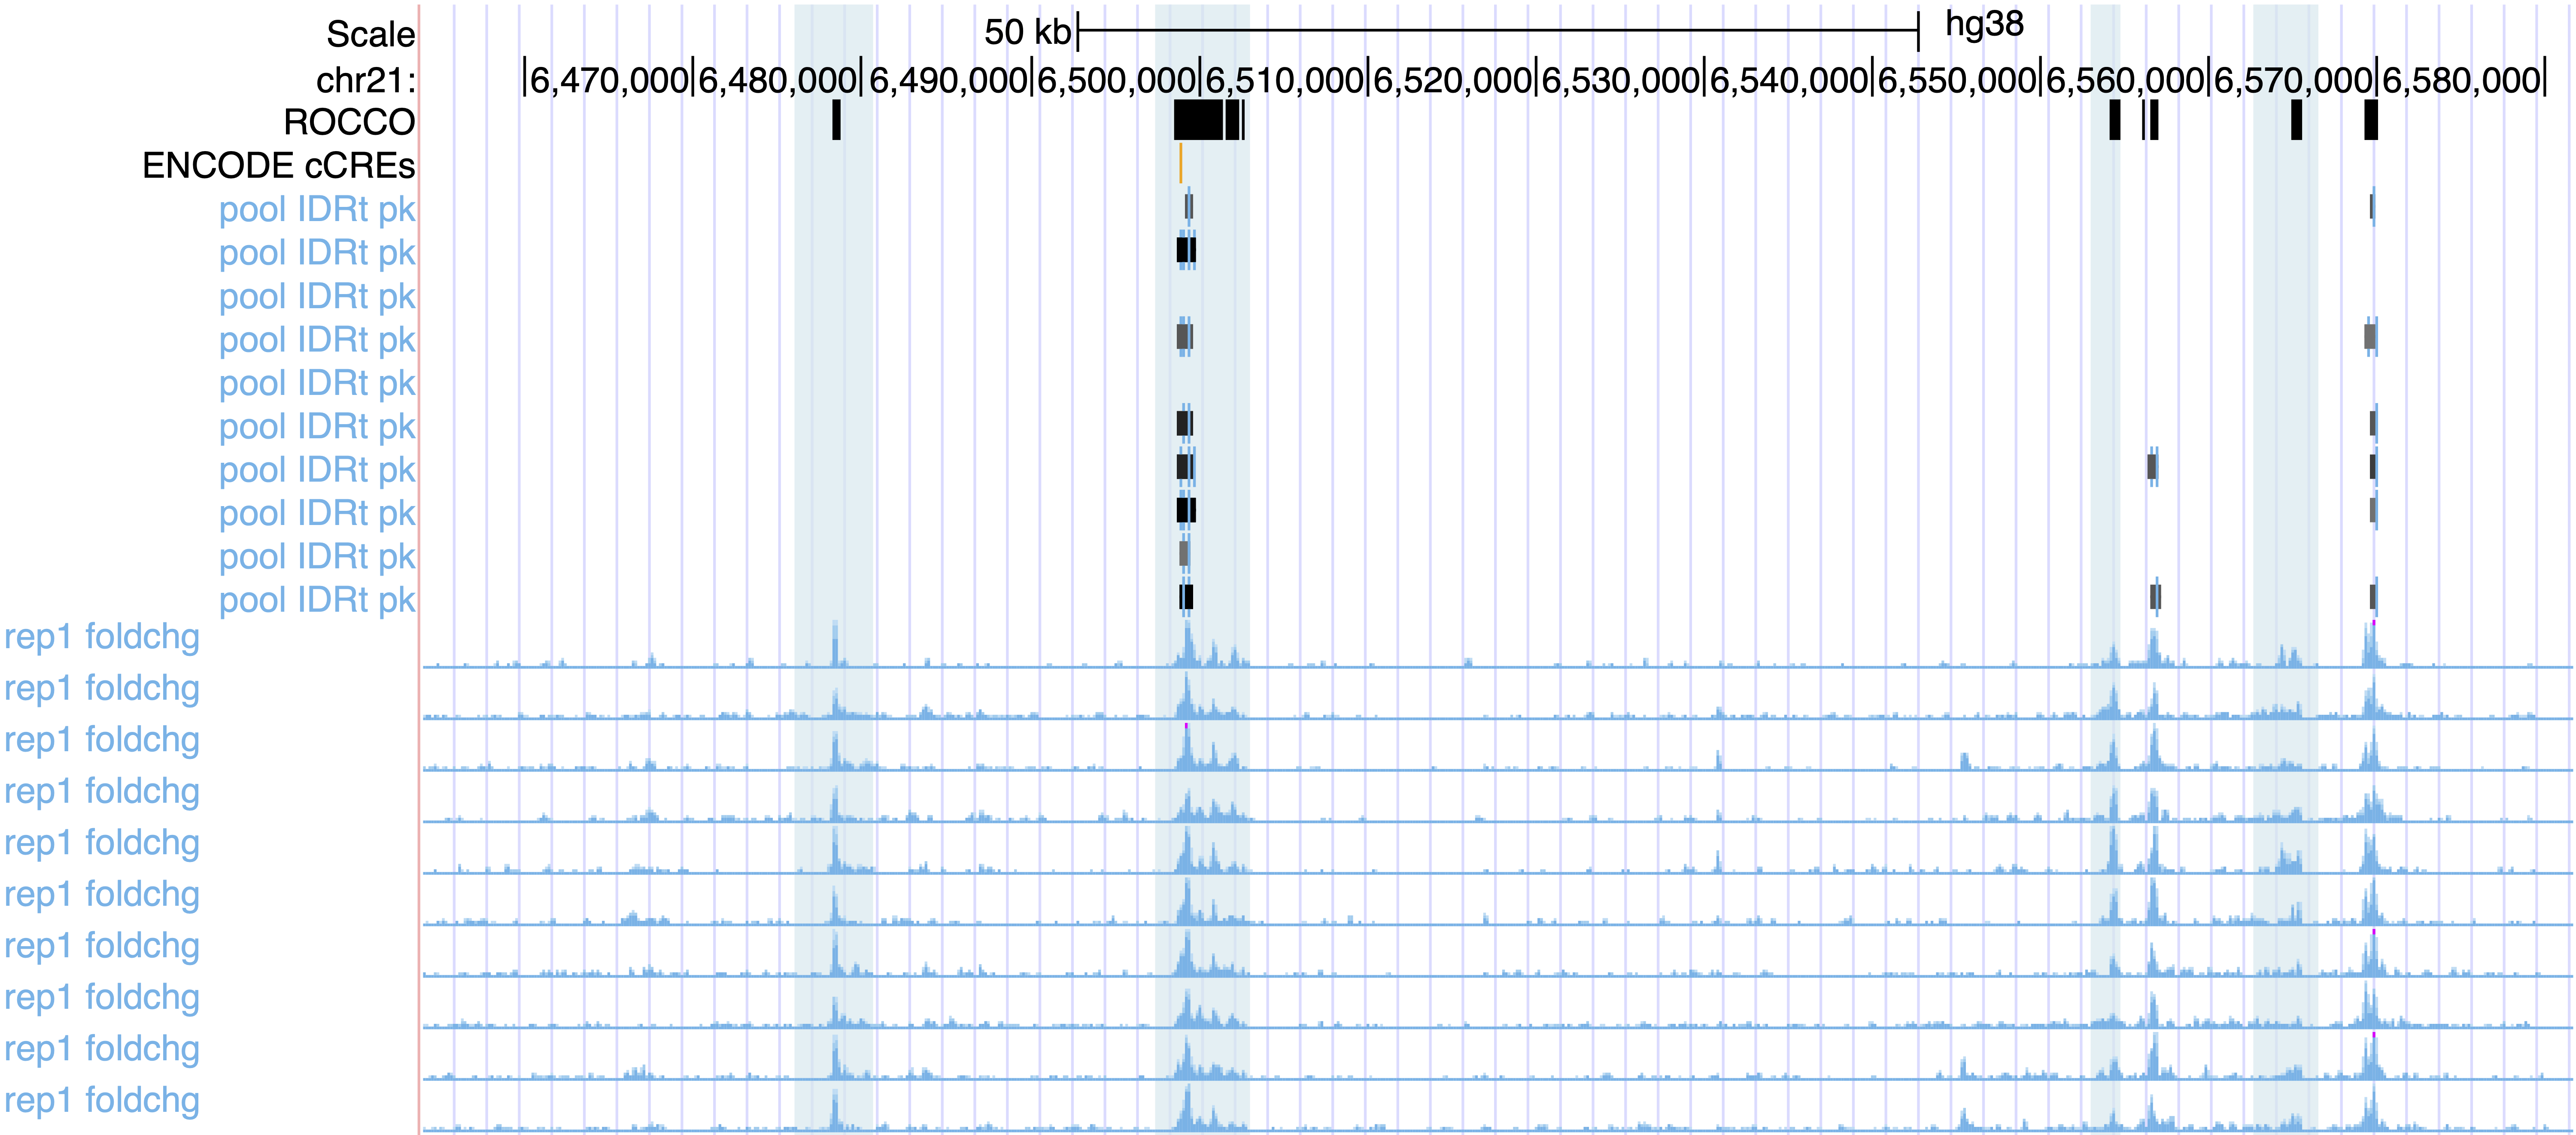

## Optional: [`rocco budgets`](https://nolan-h-hamilton.github.io/ROCCO/rocco/budgets.html)

Estimate chromosome-specific budgets based on their relative read densities as observed in the samples' `.wig` files.

The chromosome-specific budgets average to `--smean` with the ranking given by the relative read densities preserved.

In [ ]:
!rocco budgets --wigdir . --sizes hg38.sizes --smean .035 --samp_rate .20 -o budgets_params.csv

## [`rocco gwide`](https://nolan-h-hamilton.github.io/ROCCO/rocco/gwide.html)

Run ROCCO genome-wide using [`hg38_params.csv`](https://github.com/nolan-h-hamilton/ROCCO/blob/main/hg38_params.csv).

*Note*: If you ran the `rocco budgets` step, you can use `-p budgets_params.csv` instead

In [3]:
!rocco gwide -p ../hg38_params.csv --outdir demo_outdir --combine demo_out.bed

rocco chrom: reading wig file tracks_chr1/chr1_ENCFF009NCL.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF110EWQ.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF231YYD.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF395ZMS.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF495DQP.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF621AYF.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF767FGV.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF797EAL.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF801THG.bam.bw.wig
rocco chrom: reading wig file tracks_chr1/chr1_ENCFF948HNW.bam.bw.wig
rocco chrom: writing output: demo_outdir/ROCCO_out_chr1_0.035_1.0_0.0_1.0_1.0_1.0.bed

rocco chrom: reading wig file tracks_chr2/chr2_ENCFF009NCL.bam.bw.wig
rocco chrom: reading wig file tracks_chr2/chr2_ENCFF110EWQ.bam.bw.wig
rocco chrom: reading wig file tracks_chr2/chr2_ENCFF231YYD.bam.bw.wig
roc

#### (Optional) Integrating sample metadata
For differential accessibility testing with imbalanced classes, it may be beneficial to run ROCCO separately on each class and then merge results before computing the count matrix. This protocol is easily applied by invoking `rocco gwide`'s `--coldata` argument.

Example coldata file with **arbitrarily assigned** groups:
```
sample	group	sex
ENCFF495DQP	A	M
ENCFF395ZMS	A	M
ENCFF231YYD	A	M
ENCFF009NCL	A	M
ENCFF621AYF	B	M
ENCFF767FGV	B	M
ENCFF110EWQ	B	M
ENCFF797EAL	B	M
ENCFF948HNW	B	M
```

You can copy/paste the CSV above into a CSV file, `coldata.csv`, and run the command in the next cell. 

ROCCO will be run for each group (A,B) with separated results that can then be merged.

In [ ]:
!rocco gwide -p ../hg38_params.csv --coldata coldata.csv --sample_column sample --group_column group